##Installing the packages


In [ ]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Using "yfinance" to load the Microsoft dataset

In [ ]:
!pip install yfinance
import yfinance as yf

df_msft = yf.download('MSFT')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_msft.head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
1986-03-13,0.059707,0.062373,0.054376,0.054376,1031788800
1986-03-14,0.061839,0.062906,0.059707,0.059707,308160000
1986-03-17,0.062906,0.063439,0.061839,0.061839,133171200
1986-03-18,0.061306,0.063439,0.060773,0.062906,67766400
1986-03-19,0.060240,0.061839,0.059707,0.061306,47894400


In [ ]:
df_msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9840 entries, 1986-03-13 to 2025-04-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   9840 non-null   float64
 1   (High, MSFT)    9840 non-null   float64
 2   (Low, MSFT)     9840 non-null   float64
 3   (Open, MSFT)    9840 non-null   float64
 4   (Volume, MSFT)  9840 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 461.2 KB


## Simple Moving Average

<Axes: xlabel='Date'>

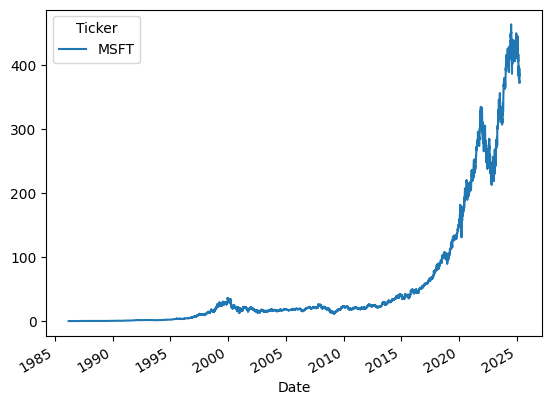

In [ ]:
df_msft['Open'].plot()

In [ ]:
df_msft['Opening: 10 days rolling window']=df_msft['Open'].rolling(window=10, min_periods=2).mean()
df_msft['Opening: 40 days rolling window']=df_msft['Open'].rolling(window=40, min_periods=2).mean()
df_msft['Opening: 60 days rolling window']=df_msft['Open'].rolling(window=60, min_periods=2).mean()

<Axes: xlabel='Date'>

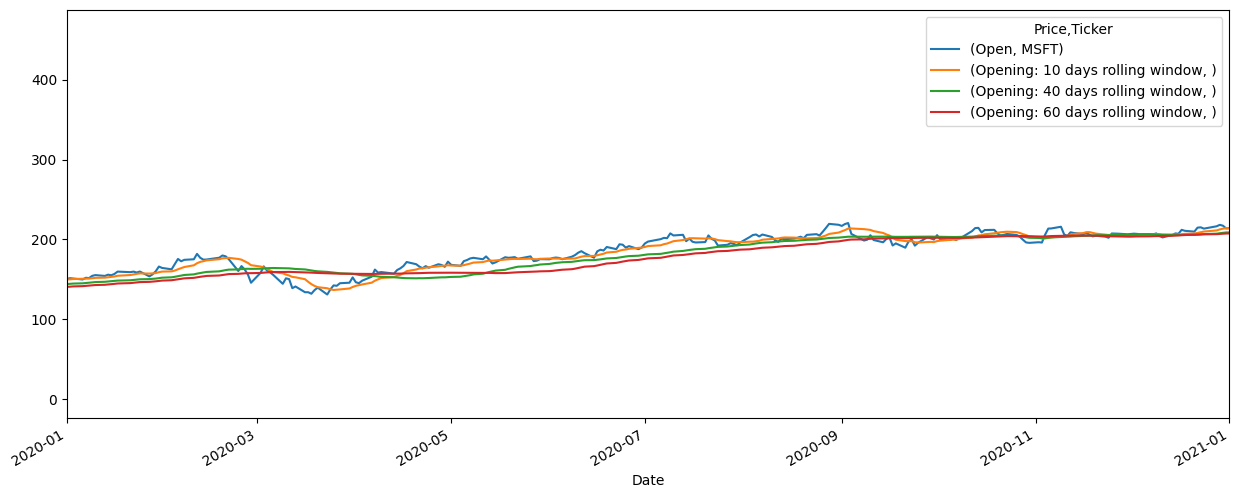

In [ ]:
df_msft[['Open','Opening: 10 days rolling window', 'Opening: 40 days rolling window', 'Opening: 60 days rolling window']].plot(xlim= ['2020-01-01', '2021-01-01'], figsize=(15,6))

## Cummulative Moving Average(CMA)

We are using "expanding" function to calculate the CMA

<Axes: xlabel='Date'>

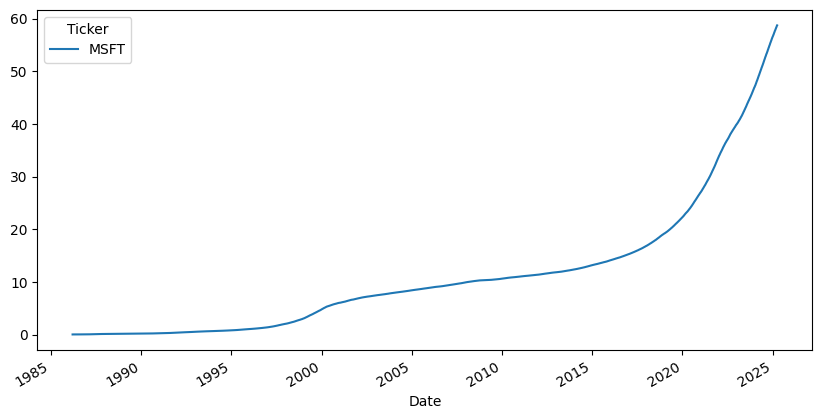

In [ ]:
df_msft['Open'].expanding().mean().plot(figsize=(10,5))

## Exponential Weighted Moving Average(EWMA)

In [ ]:
## alpha -> is the "smoothing factor" parameter
df_msft['Open_ewm_0.1'] = df_msft['Open'].ewm(alpha=0.1, adjust=False).mean()

<Axes: xlabel='Date'>

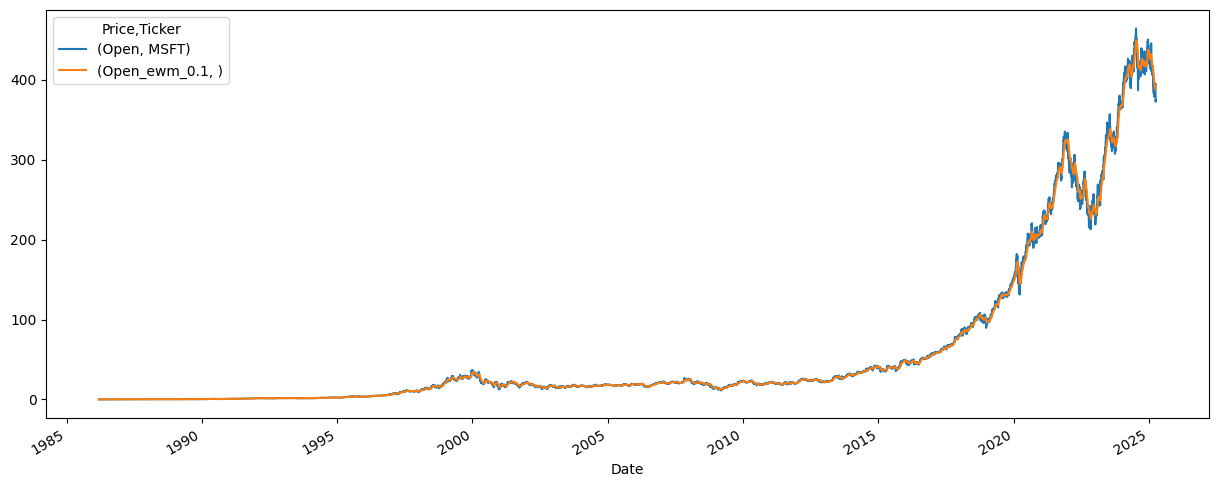

In [ ]:
df_msft[['Open', 'Open_ewm_0.1']].plot(figsize=[15,6])

<Axes: xlabel='Date'>

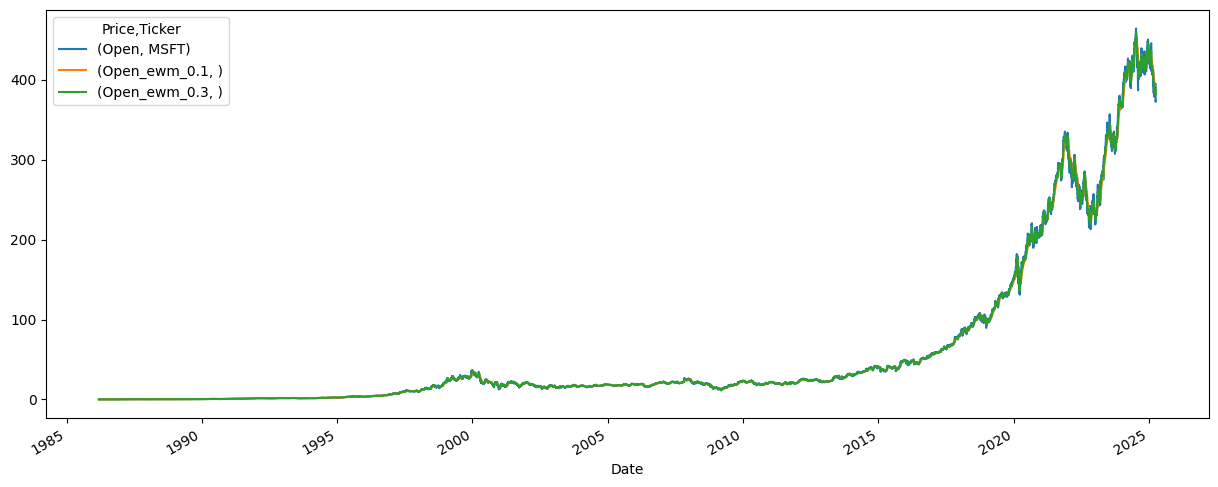

In [ ]:
df_msft['Open_ewm_0.3'] = df_msft['Open'].ewm(alpha=0.3, adjust=False).mean()
df_msft[['Open', 'Open_ewm_0.1', 'Open_ewm_0.3']].plot(figsize=[15,6])